Anggota Kelompok 4 :

Fathia Feriztha Saifuddin

Maulana Zacky Alghazari

Bhisma Pradipta Putra

Jordan Oktovianus Munthe

In [25]:
!pip3 install bees_algorithm

In [26]:
# Import library
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from bees_algorithm import BeesAlgorithm
import random

In [27]:
# Define the thresholding function
def threshold_image(image, th):
    thresholded_im = np.zeros(image.shape)
    thresholded_im[image >= th] = 1
    return thresholded_im

In [28]:
# Define the function to compute Otsu's criteria
def compute_otsu_criteria(im, th):
    thresholded_im = threshold_image(im, th)
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)

    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1
    if weight1 == 0 or weight0 == 0:
        return np.inf

    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

    return weight0 * var0 + weight1 * var1

In [29]:
# Define the function to find the best threshold using Otsu's method
def find_best_threshold(im):
    threshold_range = range(np.max(im) + 1)
    criterias = [compute_otsu_criteria(im, th) for th in threshold_range]
    best_threshold = threshold_range[np.argmin(criterias)]
    return best_threshold

In [30]:
# Define the Artificial Bee Colony algorithm for thresholding
def artificial_bee_colony(image, num_bees=20, max_iterations=100):
    # Initialize population
    population = [random.randint(0, 255) for _ in range(num_bees)]
    fitness = np.array([compute_otsu_criteria(image, threshold) for threshold in population])

    for iteration in range(max_iterations):
        # Employed bees phase
        for i in range(num_bees):
            neighbor = (population[i] + random.randint(-1, 1)) % 256
            new_fitness = compute_otsu_criteria(image, neighbor)
            if new_fitness < fitness[i]:  # Minimize the criteria
                population[i] = neighbor
                fitness[i] = new_fitness

        # Onlooker bees phase
        for i in range(num_bees):
            selected_bee = random.choices(population, weights=1/fitness, k=1)[0]
            neighbor = (selected_bee + random.randint(-1, 1)) % 256
            new_fitness = compute_otsu_criteria(image, neighbor)
            if new_fitness < fitness[i]:  # Minimize the criteria
                population[i] = neighbor
                fitness[i] = new_fitness

        # Scout bees phase
        worst_bee_index = np.argmax(fitness)  # Max because we want to replace the worst
        population[worst_bee_index] = random.randint(0, 255)
        fitness[worst_bee_index] = compute_otsu_criteria(image, population[worst_bee_index])

    best_threshold = population[np.argmin(fitness)]  # Min because we want the best criteria
    return best_threshold

In [31]:
# Load the image
path_image = '/content/Monaco.png'
im = np.asarray(Image.open(path_image).convert('L'))

# Print the image size and best threshold
print("Ukuran gambar = {}".format(im.shape))
best_threshold = artificial_bee_colony(im)
print("Threshold terbaik = {}".format(best_threshold))

# Apply the best threshold to the image
im_otsu = threshold_image(im, best_threshold)

Ukuran gambar = (653, 1160)
Threshold terbaik = 97


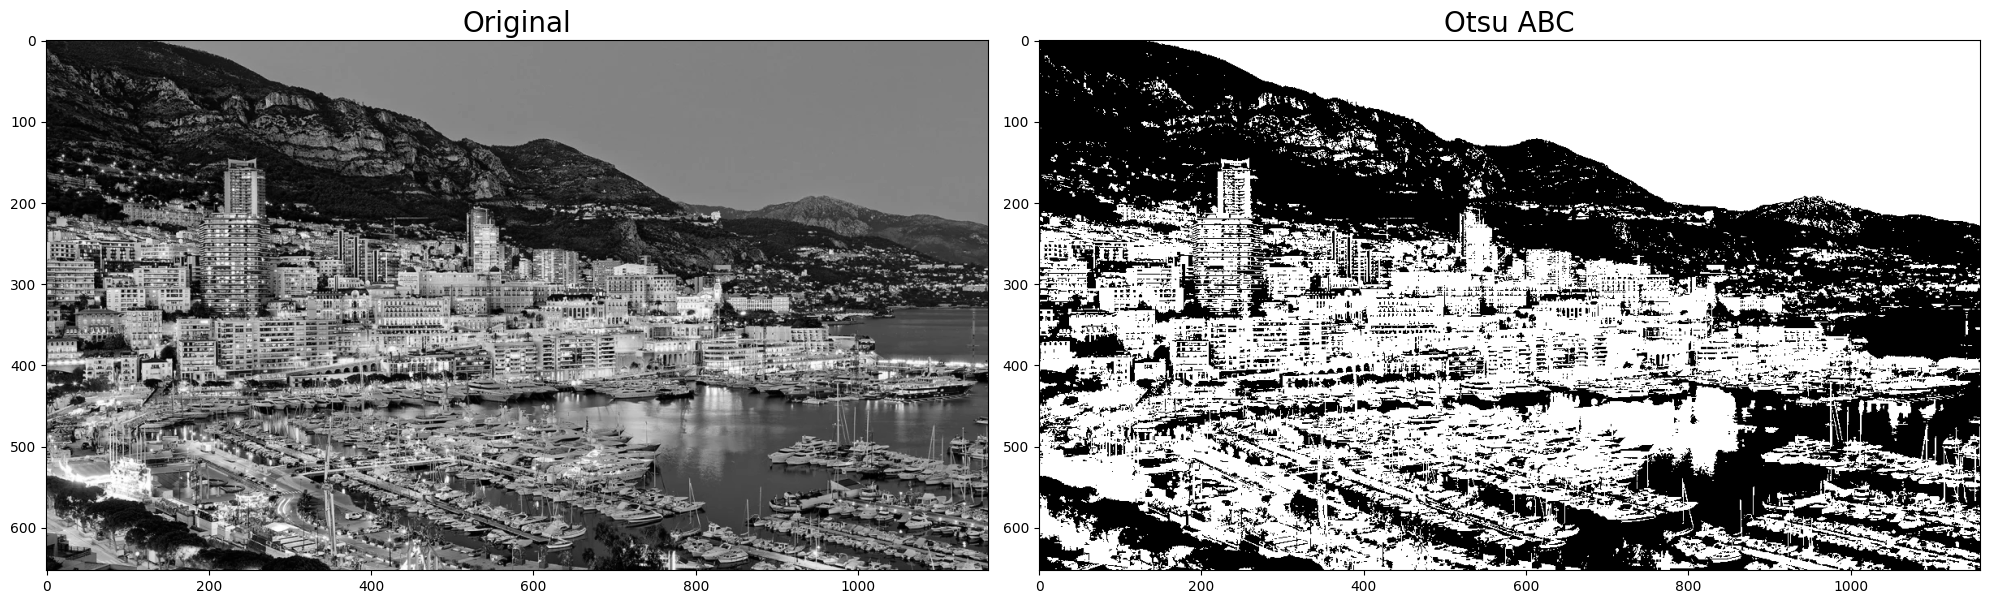

In [32]:
# Display the original and thresholded images
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('Original', fontsize=20)
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Otsu ABC', fontsize=20)
plt.imshow(im_otsu, cmap='gray')

plt.tight_layout()